Does my shuffle op work as intended? let's see. 

In [1]:
import torch
import numpy as np
from uatu.scattering import *
#from uatu.scattering.resnet import shuffle

/home/sean/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sean/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sean/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sean/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [2]:
from matplotlib import pyplot as plt

In [3]:
def shuffle(x):
    orig_size = x.size()
    x = x.view(x.size(0),x.size(1), -1)
    # shuffle the same over batch, allegedly not a problem
    # TODO this should not shuffle across channels, but that doesn't seem to matter? 
    rand_idxs = torch.randperm(x.size(2), requires_grad=False)
    #print(rand_idxs)
    x = x[:,:, rand_idxs]
    return x.view(orig_size)


In [16]:
N = 256
x = np.array(range(N**2)).reshape((1,N,N))
x = np.stack([x,x+1,x], axis = 1)

In [17]:
x.shape

(1, 3, 256, 256)

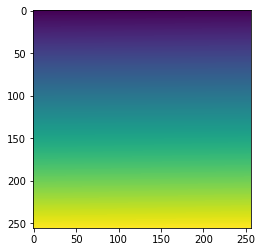

In [18]:
plt.imshow(x[:,0].squeeze())

In [19]:
s = shuffle(torch.Tensor(x)).numpy()

In [20]:
s.shape

(1, 3, 256, 256)

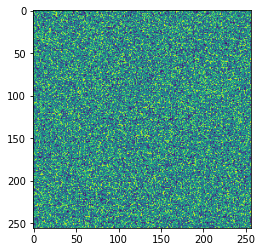

In [21]:
plt.imshow(s[:,0].squeeze())

In [22]:
s.sum(), x.sum()

(6442417700.0, 6442418176)

In [23]:
np.all(s[0,0] == s[0,1]), np.all(s[0,0]==s[0,2])

(False, True)